In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
from datetime import date

import matplotlib.pyplot as plt

yfin.pdr_override()

In [6]:
assets = ["PG","^GSPC"]
pf_data= pd.DataFrame()

for a in assets:
    pf_data[a] = pdr.get_data_yahoo(a,start ="2010-1-1")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
pf_data.shape

(3419, 2)

In [8]:
pf_data.tail()

,PG,^GSPC
Date,,
2023-07-28,156.410004,4582.229980
2023-07-31,156.300003,4588.959961
2023-08-01,156.250000,4576.729980
2023-08-02,156.589996,4513.390137
2023-08-03,157.199997,NaN


In [9]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,40.668755,1132.989990
2010-01-05,40.682079,1136.520020
2010-01-06,40.489105,1137.140015
2010-01-07,40.269535,1141.689941
2010-01-08,40.216301,1144.979980


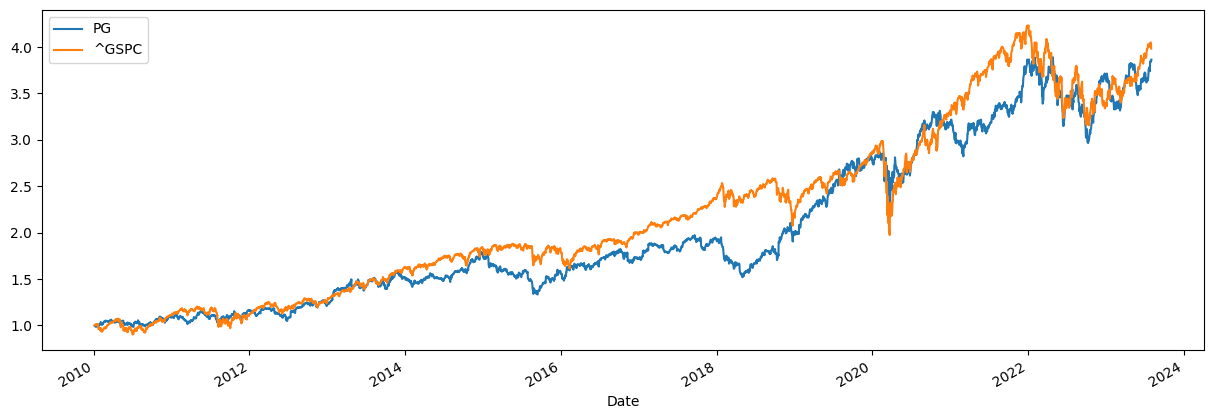

In [12]:
(pf_data/pf_data.iloc[0]).plot(figsize=(15,5));

In [13]:
log_returns=np.log(pf_data / pf_data.shift(1))

In [14]:
log_returns.mean() * 250

PG       0.098893
^GSPC    0.101126
dtype: float64

In [15]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029677,0.017249
^GSPC,0.017249,0.031121


In [18]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.567501
^GSPC,0.567501,1.000000


In [19]:
num_assets = len(assets)

In [20]:
num_assets

2

In [23]:
arr = np.random.random(2)
arr

array([0.95582737, 0.93787276])

In [24]:
arr[0] + arr[1]

1.8937001327831737

In [25]:
weights = np.random.random(num_assets)

weights /= np.sum(weights)

weights

array([0.51591642, 0.48408358])

In [26]:
weights[0] + weights[1]

1.0

## Expected Portfolio Return

In [27]:
np.sum(weights * log_returns.mean()) * 250

0.0999736576699416

### Expected Portfolio Variance

In [28]:
np.dot(weights.T,np.dot(log_returns.cov() * 250,weights))

0.02380793742528895

### Expected Portfolio Volatility

In [29]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.15429820940402694

In [30]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns,pfolio_volatilities

([0.09966828963785741,
  0.10041184053924784,
  0.10093997137254865,
  0.10027361751713057,
  0.0998274294917017,
  0.10026021816696766,
  0.09891780964209558,
  0.10053221340876477,
  0.10110673147304146,
  0.10002564767889,
  0.09957683304984889,
  0.09955559565702891,
  0.09931102216815402,
  0.099790159134744,
  0.099554417836913,
  0.09960655034825625,
  0.09952536760190425,
  0.09990670192382557,
  0.09961743933315713,
  0.10058417786817757,
  0.09963333934804987,
  0.09972110932772756,
  0.09977556237055255,
  0.10082016087943607,
  0.10021757627663141,
  0.09970455184007394,
  0.1002590970308554,
  0.09895305774981142,
  0.09960846959297044,
  0.09980926306612709,
  0.10050132065967204,
  0.09955586049520694,
  0.09989055516417254,
  0.10019278372309204,
  0.09997425479358149,
  0.10096822705629514,
  0.10007203365845269,
  0.09923718281523883,
  0.10036147248574365,
  0.09905624816489363,
  0.10042120469859749,
  0.09985981834246101,
  0.10000905091175825,
  0.1000843917434369

In [31]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns,pfolio_volatilities

(array([0.09990344, 0.10007266, 0.09990234, 0.10015103, 0.10042954,
        0.09980604, 0.10007815, 0.10057017, 0.09996401, 0.10090063,
        0.100313  , 0.09949565, 0.10010277, 0.0998228 , 0.10054819,
        0.10032187, 0.10059783, 0.09923113, 0.09957786, 0.10033008,
        0.09983441, 0.10020942, 0.09900487, 0.10080432, 0.09986205,
        0.09924127, 0.10009848, 0.10067624, 0.09918414, 0.10048824,
        0.0992788 , 0.10065655, 0.10002067, 0.10099138, 0.0998095 ,
        0.10014556, 0.10010336, 0.10080191, 0.10004472, 0.09932709,
        0.10108259, 0.10068385, 0.10014413, 0.09978417, 0.09932241,
        0.10106637, 0.09955339, 0.0993675 , 0.10101993, 0.09988058,
        0.09984709, 0.09971505, 0.09972715, 0.09921527, 0.0998051 ,
        0.10012579, 0.09975   , 0.10109884, 0.09989497, 0.10041916,
        0.09994154, 0.09955942, 0.09897579, 0.10110611, 0.10063404,
        0.10070063, 0.10026665, 0.09994139, 0.0998718 , 0.10008182,
        0.10000413, 0.10011205, 0.09943503, 0.10

In [32]:
portfolios = pd.DataFrame({"Return" : pfolio_returns,"Volatility":pfolio_volatilities})

portfolios

,Return,Volatility
0,0.099903,0.154321
1,0.100073,0.154553
2,0.099902,0.154322
3,0.100151,0.154990
4,0.100430,0.158201
...,...,...
995,0.099790,0.154714
996,0.100241,0.155749
997,0.099948,0.154287
998,0.100929,0.169929


Text(0, 0.5, 'Expected Return')

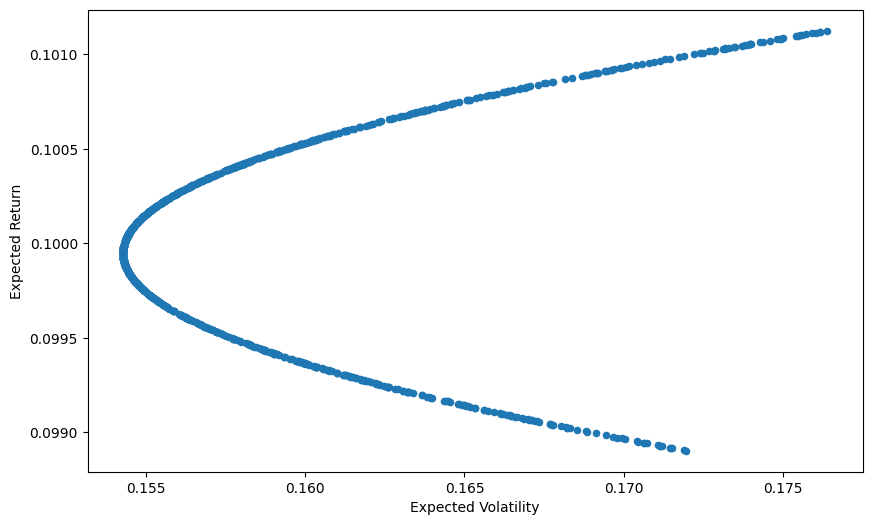

In [36]:
portfolios.plot(x="Volatility",y="Return",kind="scatter",figsize=(10,6))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")